In [9]:
# Import Necessary Packages and library
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Create url for vector for ticker symbol
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'MSFT', 'AAPL'] # Ticker vector

In [12]:
# Create a table for new post related to eahc ticker
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker # Build complete url

    req = Request(url=url, headers={'user-agent': 'my-app'}) # Post request
    response = urlopen(req) # Access response

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [13]:
# Parse data to save in table
parsed_data = [] # Initialize the vector
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([ticker, date, time, title]) # Build the data

In [14]:
# Create a dataframe
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [15]:
# Intialize the model
vader = SentimentIntensityAnalyzer()

# Lambda function to store polarity of the title based on sentiment function
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

<Figure size 720x576 with 0 Axes>

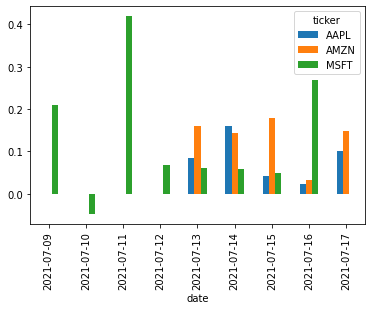

In [16]:
# Plot the graph
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()